In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sales_lag.csv')

In [ ]:
bool_columns = ['Foods', 'Hobbies', 'Household', 'California', 'Texas', 'Wisconsin']
df[bool_columns] = df[bool_columns].astype(int)

In [ ]:
df['month'] = ((df.index+1) % 12).astype(int)

In [ ]:
rolling_features = []
window_size=3
for i in range(1, 70):
    rolling_mean = df[f'm_{i}'].rolling(window=window_size, min_periods=1).mean()
    rolling_sum = df[f'm_{i}'].rolling(window=window_size, min_periods=1).sum()

    rolling_features.append(rolling_mean.rename(f'm_{i}_rolling_mean'))
    rolling_features.append(rolling_sum.rename(f'm_{i}_rolling_sum'))

df = pd.concat([df] + rolling_features, axis=1)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
feature_cols = [f'm_{i}' for i in range(1, 70)] + \
                [f'm_{i}_lag1' for i in range(1, 70)] + \
                [f'm_{i}_lag2' for i in range(1, 70)] + \
                [f'm_{i}_lag3' for i in range(1, 70)] + \
                ['month'] + bool_columns

In [ ]:
X_67 = df.drop(columns=['m_67', 'm_68', 'm_69',
                        'm_68_lag1', 'm_68_lag2', 'm_68_lag3',
                        'm_69_lag1', 'm_69_lag2', 'm_69_lag3',
                        'total_sales'] +
                       [f'm_{i}_rolling_mean' for i in range(1, 70)] +
                       [f'm_{i}_rolling_sum' for i in range(1, 70)])
y_67 = df['m_67']

In [ ]:
def train_model(X, y, reg_lambda=1.0, reg_alpha=0.0):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        reg_lambda=reg_lambda,  # L2 regularization
        reg_alpha=reg_alpha      # L1 regularization
    )
    model.fit(X_train, y_train)
    return model, X_test, y_test

In [ ]:
def feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    return feature_importance_df

In [ ]:
model_67, X_test_67, y_test_67 = train_model(X_67, y_67)
predictions_67 = model_67.predict(X_test_67)
imp_features_67 = feature_importance(model_67,  X_67.columns)
imp_features_67.head(10)

,Feature,Importance
65,m_66,0.273911
61,m_62,0.185711
25,m_26,0.061251
12,m_13,0.038941
64,m_65,0.032675
187,m_55_lag2,0.020270
28,m_29,0.020151
241,m_42_lag3,0.017282
37,m_38,0.014141
273,month,0.013198


In [ ]:
mae_67 = mean_absolute_error(y_test_67, predictions_67)
mse_67 = mean_squared_error(y_test_67, predictions_67)
print(f'Mean Absolute Error for m_67: {mae_67}')
print(f'Mean Squared Error for m_67: {mse_67}')

Mean Absolute Error for m_67: 11.604793065623507
Mean Squared Error for m_67: 613.4814497648891


N = 46 was found to be the optimal value for least MAE for month 67.

In [ ]:
n=46
top_features_67 = imp_features_67.head(n)
important_features_67 = top_features_67['Feature'].tolist()
X_67_important = df[important_features_67]
model_67_imp, X_test_67_imp, y_test_67_imp = train_model(X_67_important, y_67)
predictions_67_imp = model_67_imp.predict(X_test_67_imp)

In [ ]:
with open('optimal_features_67.pkl', 'wb') as f:
    pickle.dump(important_features_67, f)

In [ ]:
with open('optimal_features_68.pkl', 'wb') as f:
    pickle.dump(important_features_68, f)

In [ ]:
with open('optimal_features_69.pkl', 'wb') as f:
    pickle.dump(important_features_69, f)

In [ ]:
mae_67_imp = mean_absolute_error(y_test_67_imp, predictions_67_imp)
mse_67_imp = mean_squared_error(y_test_67_imp, predictions_67_imp)
print(f'Mean Absolute Error for m_67: {mae_67_imp}')
print(f'Mean Squared Error for m_67: {mse_67_imp}')

Mean Absolute Error for m_67: 11.176186027780908
Mean Squared Error for m_67: 551.9560368900999


In [ ]:
X_68 = pd.concat([X_67, pd.DataFrame({'m_67': predictions_67_imp})], axis=1)
X_68['m_68_lag1'] = X_68['m_67']
X_68['m_68_lag2'] = df['m_66']
X_68['m_68_lag3'] = df['m_65']

X_68['m_68_rolling_mean'] = X_68[['m_67']].rolling(window=window_size, min_periods=1).mean()
X_68['m_68_rolling_sum'] = X_68[['m_67']].rolling(window=window_size, min_periods=1).sum()

X_68 = X_68.drop(columns=[f'm_68_rolling_mean', f'm_68_rolling_sum'])

y_68 = df['m_68']

In [ ]:
model_68, X_test_68, y_test_68 = train_model(X_68, y_68)
predictions_68 = model_68.predict(X_test_68)
imp_features_68 = feature_importance(model_68,  X_68.columns)

In [ ]:
import pickle

In [ ]:
with open('model_68_XGBoost.pkl', 'wb') as f:
    pickle.dump(model_68_imp, f)

In [ ]:
imp_features_68.head(10)

,Feature,Importance
65,m_66,0.246349
61,m_62,0.118328
34,m_35,0.059503
64,m_65,0.044791
28,m_29,0.034317
16,m_17,0.032258
31,m_32,0.028462
62,m_63,0.020616
57,m_58,0.020248
241,m_42_lag3,0.015572


In [ ]:
mae_68 = mean_absolute_error(y_test_68, predictions_68)
mse_68 = mean_squared_error(y_test_68, predictions_68)
print(f'Mean Absolute Error for m_68: {mae_68}')
print(f'Mean Squared Error for m_68: {mse_68}')

Mean Absolute Error for m_68: 13.298501407644137
Mean Squared Error for m_68: 808.9599349832966


N = 134 was found to be the optimal value for least MAE for month 68.

In [ ]:
n=134
top_features_68 = imp_features_68.head(n)
important_features_68 = top_features_68['Feature'].tolist()
X_68_important = df[important_features_68]
model_68_imp, X_test_68_imp, y_test_68_imp = train_model(X_68_important, y_68)
predictions_68_imp = model_68_imp.predict(X_test_68_imp)

In [ ]:
mae_68_imp = mean_absolute_error(y_test_68_imp, predictions_68_imp)
mse_68_imp = mean_squared_error(y_test_68_imp, predictions_68_imp)
print(f'Mean Absolute Error for m_68: {mae_68_imp}')
print(f'Mean Squared Error for m_68: {mse_68_imp}')

Mean Absolute Error for m_68: 11.237315394448453
Mean Squared Error for m_68: 760.260955448889


In [ ]:
X_69 = pd.concat([X_68, pd.DataFrame({'m_68': predictions_68_imp})], axis=1)
X_69['m_69_lag1'] = X_69['m_68']
X_69['m_69_lag2'] = X_69['m_67']
X_69['m_69_lag3'] = df['m_66']

X_69['m_69_rolling_mean'] = X_69[['m_68']].rolling(window=window_size, min_periods=1).mean()
X_69['m_69_rolling_sum'] = X_69[['m_68']].rolling(window=window_size, min_periods=1).sum()

X_69 = X_69.drop(columns=[f'm_69_rolling_mean', f'm_69_rolling_sum'], errors='ignore')

In [ ]:
y_69 = df['m_69']
model_69, X_test_69, y_test_69 = train_model(X_69, y_69)
predictions_69 = model_69.predict(X_test_69)
imp_features_69 = feature_importance(model_69,  X_69.columns)
imp_features_69.head(10)

,Feature,Importance
61,m_62,0.306282
29,m_30,0.073186
58,m_59,0.064938
32,m_33,0.063146
65,m_66,0.058570
64,m_65,0.038636
16,m_17,0.033533
62,m_63,0.032108
17,m_18,0.022434
55,m_56,0.017567


In [ ]:
mae_69 = mean_absolute_error(y_test_69, predictions_69)
mse_69 = mean_squared_error(y_test_69, predictions_69)
print(f'Mean Absolute Error for m_69: {mae_69}')
print(f'Mean Squared Error for m_69: {mse_69}')

Mean Absolute Error for m_69: 14.51834279631005
Mean Squared Error for m_69: 1091.062015459757


N = 192 was found to be the optimal value for least MAE for month 69.

In [ ]:
n=192
top_features_69 = imp_features_69.head(n)
important_features_69 = top_features_69['Feature'].tolist()
X_69_important = df[important_features_69]
model_69_imp, X_test_69_imp, y_test_69_imp = train_model(X_69_important, y_69)
predictions_69_imp = model_69_imp.predict(X_test_69_imp)

In [ ]:
mae_69_imp = mean_absolute_error(y_test_69_imp, predictions_69_imp)
mse_69_imp = mean_squared_error(y_test_69_imp, predictions_69_imp)
print(f'Mean Absolute Error for m_69: {mae_69_imp}')
print(f'Mean Squared Error for m_69: {mse_69_imp}')

Mean Absolute Error for m_69: 11.455371634165447
Mean Squared Error for m_69: 637.1550751438928


In [ ]:
with open('model_69_XGBoost.pkl', 'wb') as f:
    pickle.dump(model_69_imp, f)

In [ ]:
results = pd.DataFrame({
    'Actual m_67': y_test_67,
    'Predicted m_67': predictions_67_imp,
    'Actual m_68': y_test_68,
    'Predicted m_68': predictions_68_imp,
    'Actual m_69': y_test_69,
    'Predicted m_69': predictions_69_imp
})

In [ ]:
results.head()

,Actual m_67,Predicted m_67,Actual m_68,Predicted m_68,Actual m_69,Predicted m_69
7317,819,783.452454,963,706.782593,632,951.755554
7318,1161,978.230835,850,1268.214600,642,831.196655
7319,709,749.632019,615,718.575500,638,625.654846
7320,707,613.944702,920,630.644470,665,836.632446
7321,793,534.981384,692,737.435303,617,721.681702


In [ ]:
results = results.reset_index(drop=True)
results.head()

,Actual m_67,Predicted m_67,Actual m_68,Predicted m_68,Actual m_69,Predicted m_69
0,819,783.452454,963,706.782593,632,951.755554
1,1161,978.230835,850,1268.214600,642,831.196655
2,709,749.632019,615,718.575500,638,625.654846
3,707,613.944702,920,630.644470,665,836.632446
4,793,534.981384,692,737.435303,617,721.681702


In [ ]:
import seaborn as sns

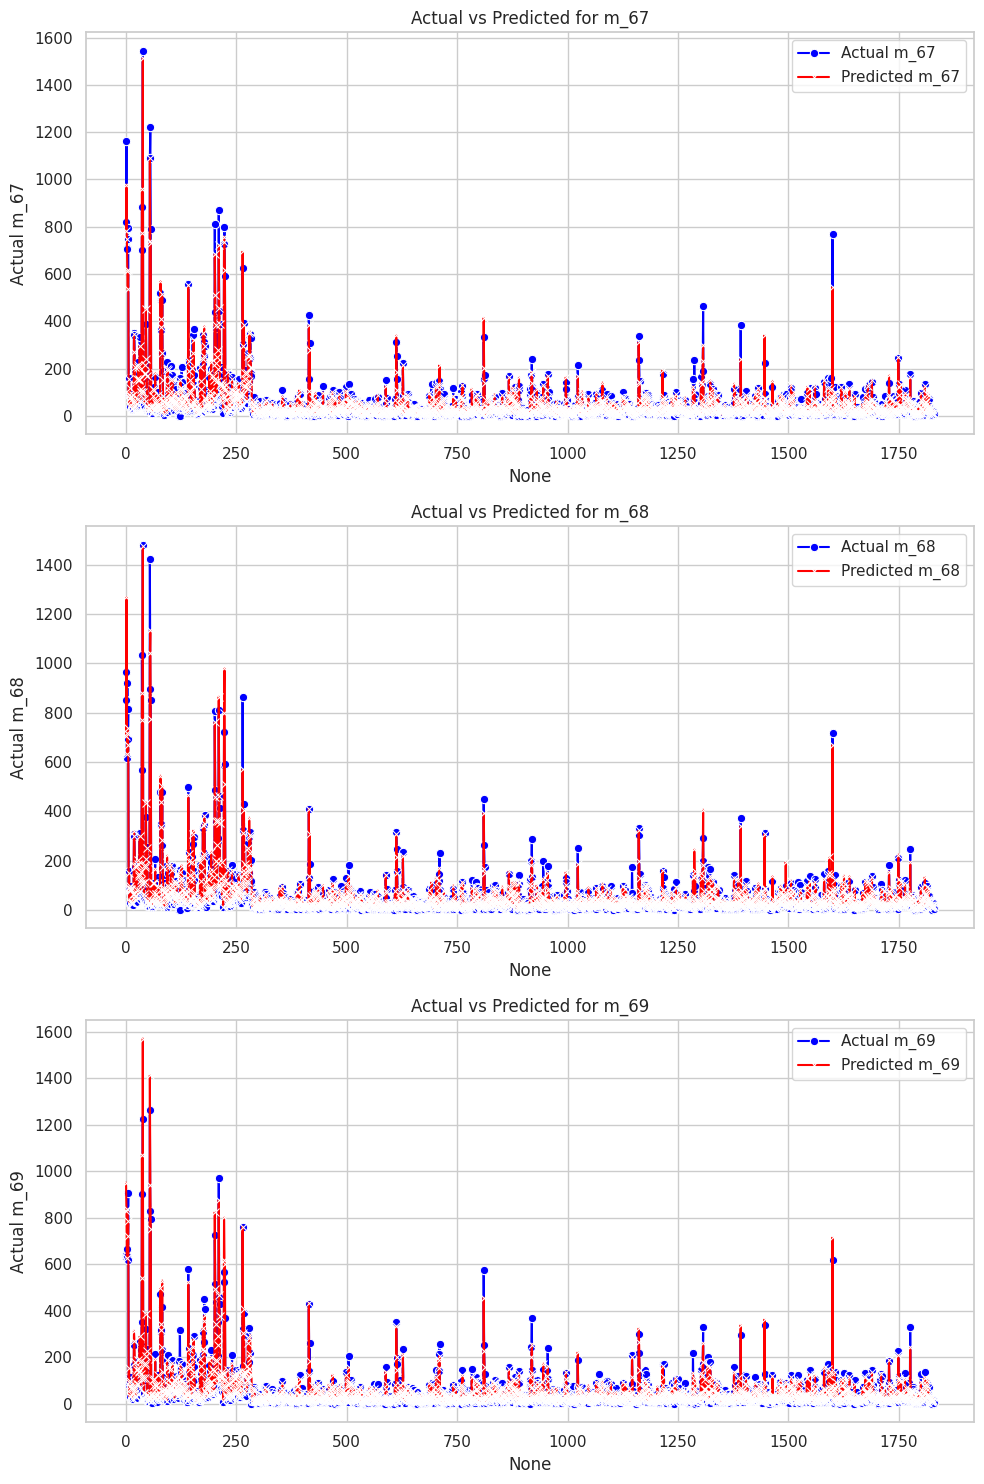

In [ ]:
sns.set(style="whitegrid")
item_index = results.index

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.lineplot(x=item_index, y=results['Actual m_67'], label='Actual m_67', color='blue', marker='o', ax=axes[0])
sns.lineplot(x=item_index, y=results['Predicted m_67'], label='Predicted m_67', color='red', marker='x', ax=axes[0])
axes[0].set_title('Actual vs Predicted for m_67')

sns.lineplot(x=item_index, y=results['Actual m_68'], label='Actual m_68', color='blue', marker='o', ax=axes[1])
sns.lineplot(x=item_index, y=results['Predicted m_68'], label='Predicted m_68', color='red', marker='x', ax=axes[1])
axes[1].set_title('Actual vs Predicted for m_68')

sns.lineplot(x=item_index, y=results['Actual m_69'], label='Actual m_69', color='blue', marker='o', ax=axes[2])
sns.lineplot(x=item_index, y=results['Predicted m_69'], label='Predicted m_69', color='red', marker='x', ax=axes[2])
axes[2].set_title('Actual vs Predicted for m_69')

plt.tight_layout()
plt.show()

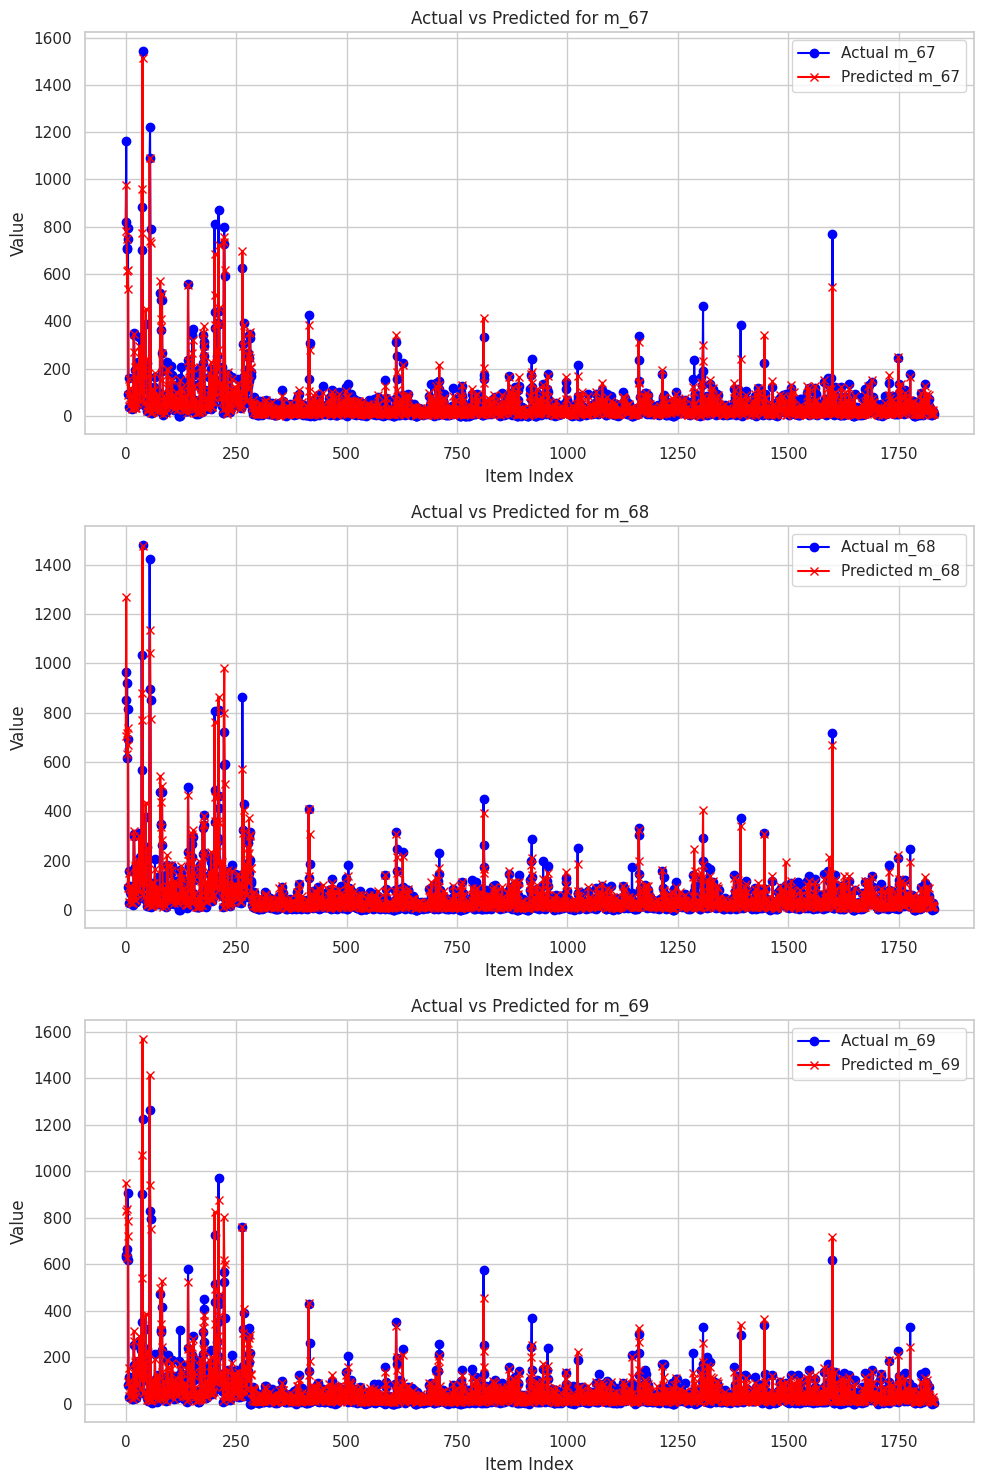

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for m_67
axes[0].plot(item_index, results['Actual m_67'], label='Actual m_67', color='blue', marker='o')
axes[0].plot(item_index, results['Predicted m_67'], label='Predicted m_67', color='red', marker='x')
axes[0].set_title('Actual vs Predicted for m_67')
axes[0].set_xlabel('Item Index')
axes[0].set_ylabel('Value')
axes[0].legend()

# Plot for m_68
axes[1].plot(item_index, results['Actual m_68'], label='Actual m_68', color='blue', marker='o')
axes[1].plot(item_index, results['Predicted m_68'], label='Predicted m_68', color='red', marker='x')
axes[1].set_title('Actual vs Predicted for m_68')
axes[1].set_xlabel('Item Index')
axes[1].set_ylabel('Value')
axes[1].legend()

# Plot for m_69
axes[2].plot(item_index, results['Actual m_69'], label='Actual m_69', color='blue', marker='o')
axes[2].plot(item_index, results['Predicted m_69'], label='Predicted m_69', color='red', marker='x')
axes[2].set_title('Actual vs Predicted for m_69')
axes[2].set_xlabel('Item Index')
axes[2].set_ylabel('Value')
axes[2].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()